<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock_v12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
#!pip install yfinance
#!pip install finta
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

# 載入資料

In [232]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import seaborn as sns
yf.pdr_override()
y_symbols = ["^TWII"]
from datetime import datetime
startdate = datetime(2010,12,1)
enddate = datetime(2022,12,30)
df = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)
print(df.shape)
display(df.head(3))
display(df.tail(3))

[*********************100%***********************]  1 of 1 completed
(2956, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-01,8430.5996,8520.1104,8428.6396,8520.1104,8520.0781,4202800
2010-12-02,8598.0098,8641.1299,8572.6504,8585.7695,8585.7373,4731800
2010-12-03,8630.8799,8659.6201,8618.2598,8624.0098,8623.9775,3710800


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200


# Label triple_barrier

In [233]:
import numpy as np
import math
'''
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

ret = triple_barrier(df.Close,1.03,0.97,20)['triple_barrier_signal']
df = df.join(ret)
'''

"\ndef triple_barrier(price, ub, lb, max_period):\n\n    def end_price(s):\n        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]\n    \n    r = np.array(range(max_period))\n    \n    def end_time(s):\n        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]\n\n    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)\n    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)\n    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') \n                   for i, k in enumerate(t)], index=t.index).dropna()\n\n    signal = pd.Series(0, p.index)\n    signal.loc[p > ub] = 1\n    signal.loc[p < lb] = -1\n    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})\n\n    return ret\n\nret = triple_barrier(df.Close,1.03,0.97,20)['triple_barrier_signal']\ndf = df.join(ret)\n"

In [234]:
import pandas as pd
import numpy as np

def triple_barrier(price, ub, lb, max_period):
    def end_price(s):
        end = s.iloc[-1]
        for i in r:
            if s.iloc[i] >= ub:
                end = s.iloc[i]
                break
            elif s.iloc[i] <= lb:
                end = s.iloc[i]
                break
        return end / s.iloc[0]

    def end_time(s):
        for i in r:
            if s.iloc[i] >= ub or s.iloc[i] <= lb:
                return i
        return max_period - 1

    r = np.arange(max_period)
    signals = pd.DataFrame(index=price.index)
    signals['triple_barrier_signal'] = 0
    signals['end_time'] = 0
    signals['end_price'] = 0.0

    for i in range(max_period, len(price)):
        window = price.iloc[i-max_period:i]
        signals.loc[window.index[-1], 'triple_barrier_signal'] = np.sign(window.iloc[-1] - window.iloc[0])
        signals.loc[window.index[-1], 'end_time'] = end_time(window)
        signals.loc[window.index[-1], 'end_price'] = end_price(window)

    return signals
ret = triple_barrier(df.Close,1.03,0.97,20)['triple_barrier_signal']
df = df.join(ret)


In [235]:
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal
Date,,,,,,,
2022-12-02,14933.2002,15021.7305,14921.0596,14970.6797,14970.6797,2999500,1
2022-12-05,14972.1699,15088.0596,14969.9697,14980.7402,14980.7402,3216700,1
2022-12-06,14955.2900,14957.8203,14728.8799,14728.8799,14728.8799,3221700,1
2022-12-07,14708.0801,14823.1504,14630.0098,14630.0098,14630.0098,3266900,1
2022-12-08,14631.2100,14634.1602,14464.2002,14553.0400,14553.0400,2428500,1
2022-12-09,14620.2695,14742.7900,14620.2695,14705.4297,14705.4297,2543200,1
2022-12-12,14658.4600,14658.4600,14538.6602,14612.5898,14612.5898,2221600,1
2022-12-13,14617.8604,14658.7002,14515.7402,14522.9600,14522.9600,2730600,-1
2022-12-14,14557.5596,14739.3604,14557.5596,14739.3604,14739.3604,2640200,1


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='triple_barrier_signal', ylabel='count'>

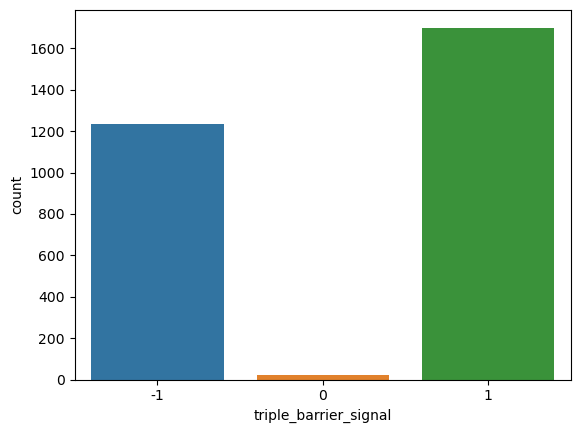

In [236]:
df['triple_barrier_signal'].value_counts()
sns.countplot(df['triple_barrier_signal'])

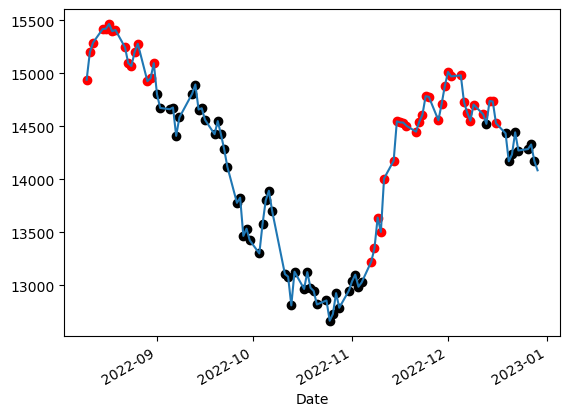

In [237]:
import matplotlib.pyplot as plt

df_recent = df.tail(100)
buy = df_recent[df_recent['triple_barrier_signal']==1]['Close']
sell = df_recent[df_recent['triple_barrier_signal']==-1]['Close']
df_recent['Close'].plot()#後20筆是前20筆的驗證
plt.scatter(buy.index,buy.values,color='red')
plt.scatter(sell.index,sell.values,color='black')
plt.show()

# 建立ohlcv

In [238]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

count   2955.0000
mean      53.1371
std       12.6405
min        9.9482
25%       44.2815
50%       53.9690
75%       61.8662
max      100.0000
Name: RSI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI
Date,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346


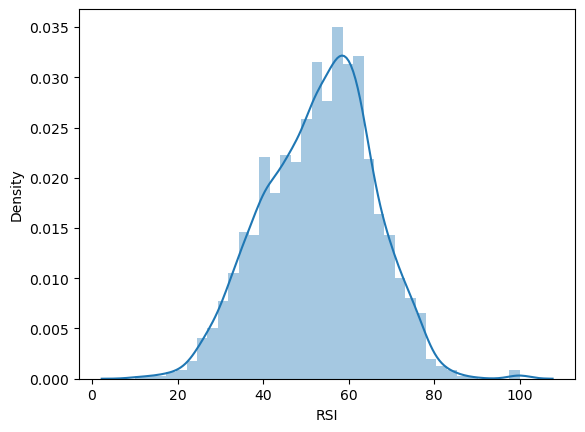

In [239]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count   2943.0000
mean     -41.6623
std       31.7513
min     -100.0000
25%      -70.1499
50%      -36.0510
75%      -12.4631
max       -0.0000
Name: Williams %R, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R
Date,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551


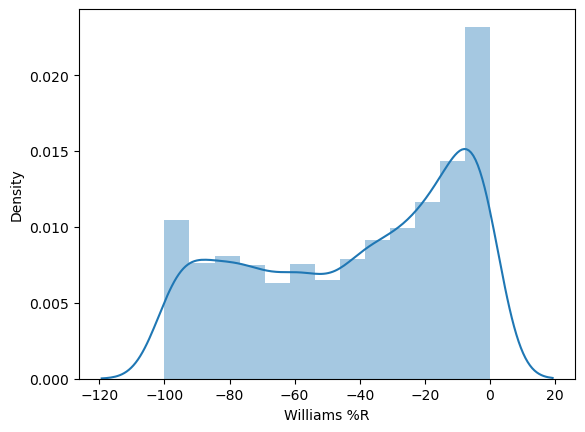

In [240]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count    2916.0000
mean    10524.8963
std      2937.9191
min      7003.6941
25%      8436.5167
50%      9598.7950
75%     10919.1936
max     18134.3023
Name: SMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Date,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068


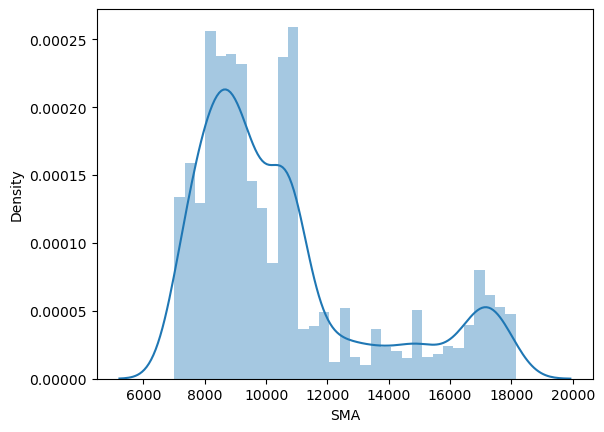

In [241]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count    2956.0000
mean    10532.2799
std      2947.4375
min      6806.5117
25%      8477.4300
50%      9593.4953
75%     11097.4647
max     18370.1916
Name: EMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500,14422.5496
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551,14395.0657
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814,14381.7385
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860,14340.0107
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125


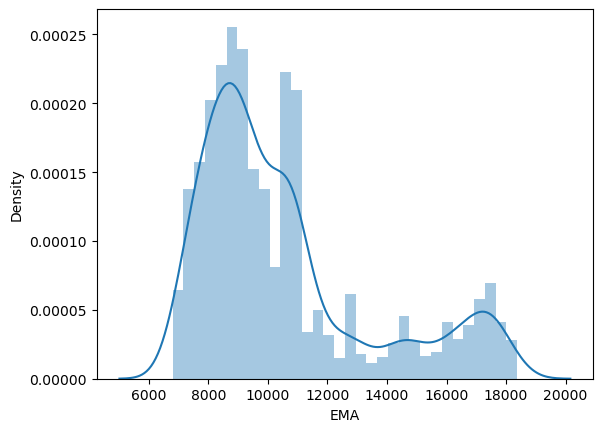

In [242]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count    2948.0000
mean    10540.0679
std      2952.8882
min      6776.1840
25%      8464.1685
50%      9594.7292
75%     11134.8863
max     18389.1466
Name: WMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500,14422.5496,14380.7566
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551,14395.0657,14347.1755
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814,14381.7385,14327.5394
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860,14340.0107,14285.9691
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501


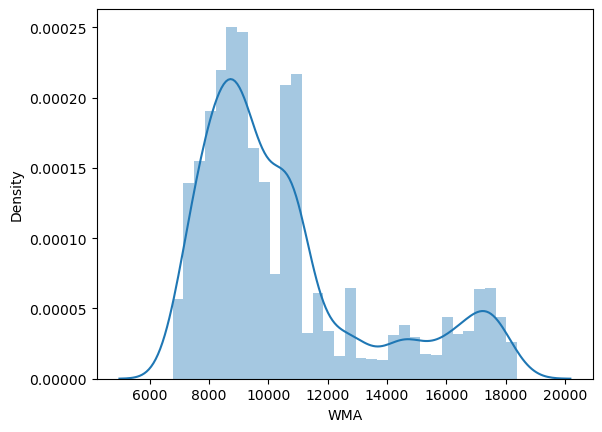

In [243]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count    2938.0000
mean    10549.9557
std      2962.5497
min      6715.3964
25%      8454.2025
50%      9594.6211
75%     11187.8212
max     18487.9532
Name: HMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734


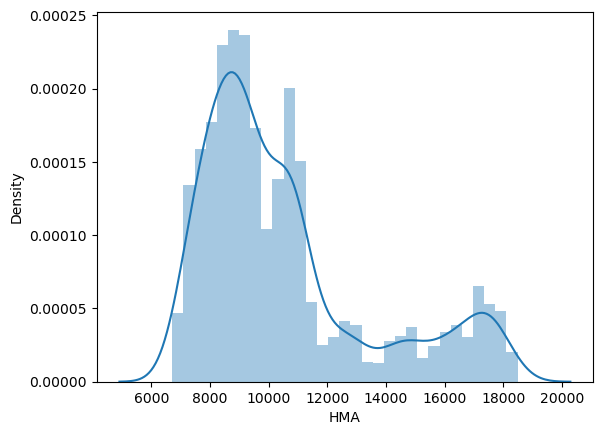

In [244]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count    2956.0000
mean    10540.0184
std      2955.8942
min      6661.1027
25%      8474.5761
50%      9573.2439
75%     11161.5749
max     18516.7710
Name: TEMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790


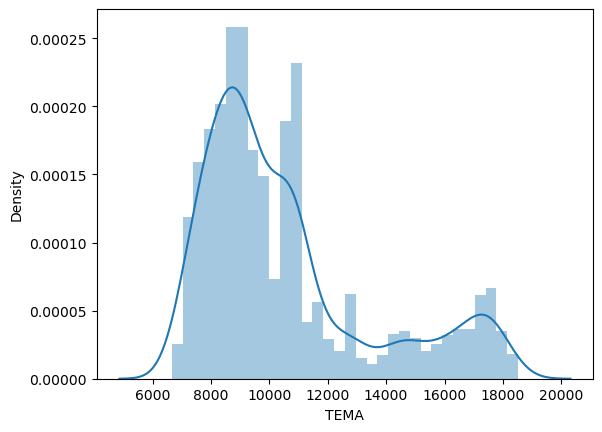

In [245]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count   2955.0000
mean      17.3007
std      112.5232
min     -367.4168
25%      -68.2137
50%       38.3571
75%      101.5356
max      347.4393
Name: CCI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083


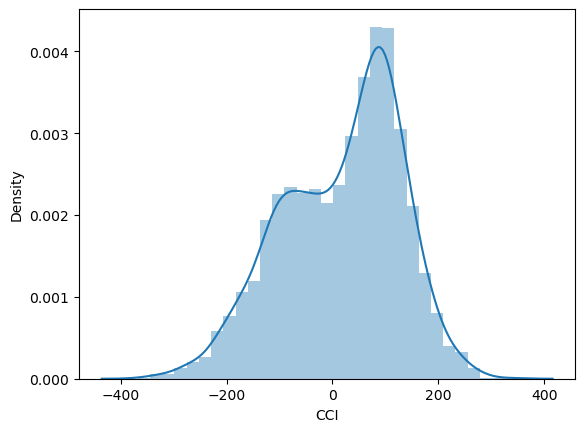

In [246]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count   2955.0000
mean       6.7913
std       29.7090
min      -86.4642
25%      -14.0070
50%        9.6501
75%       27.5922
max      100.0000
Name: CMO, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112


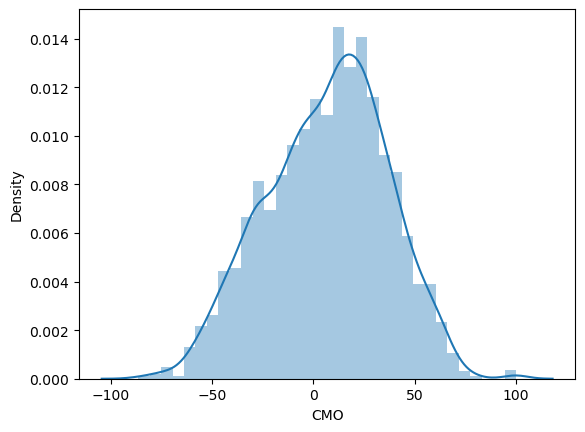

In [247]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count   2956.0000
mean       0.0516
std       39.4709
min     -244.0728
25%      -19.6648
50%        0.5063
75%       20.4447
max      214.8022
Name: MACD, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729


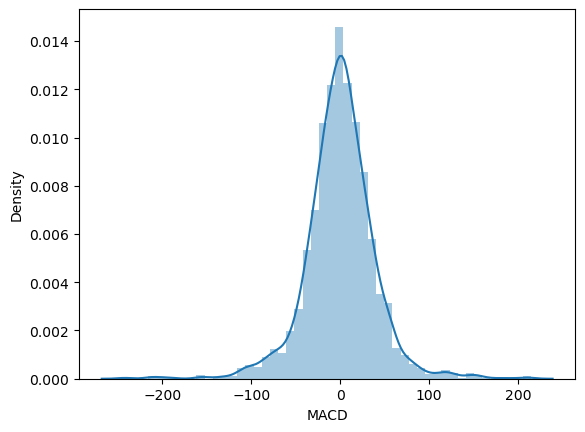

In [248]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count   2956.0000
mean       0.0003
std        0.3515
min       -2.3559
25%       -0.2060
50%        0.0007
75%        0.2027
max        1.5929
Name: PPO, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617,-0.6235
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279,-0.5876
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240,-0.5216
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841,-0.5269
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729,-0.5460


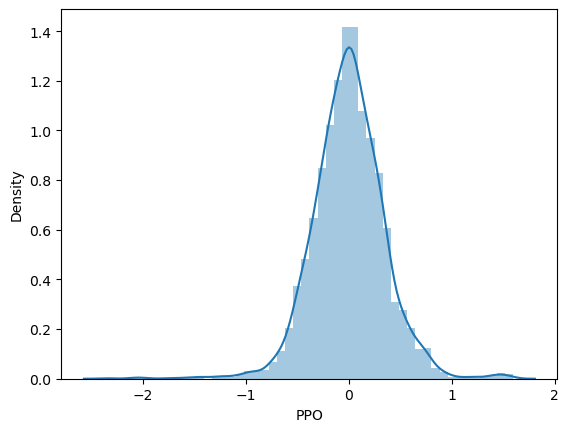

In [249]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count   2944.0000
mean       0.2680
std        3.5219
min      -23.3620
25%       -1.6866
50%        0.5811
75%        2.4895
max       16.7731
Name: ROC, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617,-0.6235,-2.4496
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279,-0.5876,-1.8409
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240,-0.5216,-2.5637
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841,-0.5269,-3.0076
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729,-0.5460,-3.0155


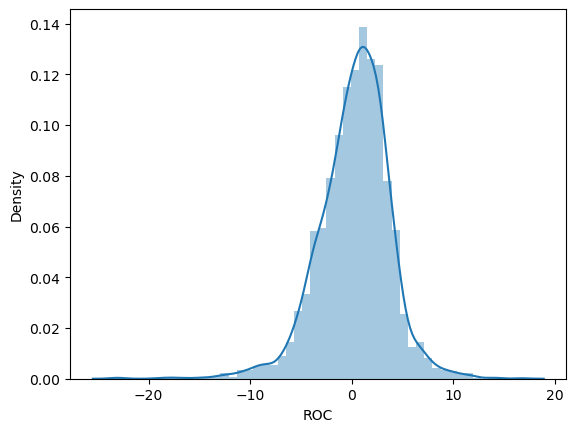

In [250]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count          2947.0000
mean     2454245359.9014
std      5378975058.0555
min     -6487265871.6930
25%      -377358024.9805
50%      1475979786.0887
75%      3405907734.7332
max     26567276530.1988
Name: CFI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617,-0.6235,-2.4496,886349549.8526
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279,-0.5876,-1.8409,802794548.1101
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240,-0.5216,-2.5637,748768323.8329
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841,-0.5269,-3.0076,649242123.9626
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729,-0.5460,-3.0155,538357618.6710


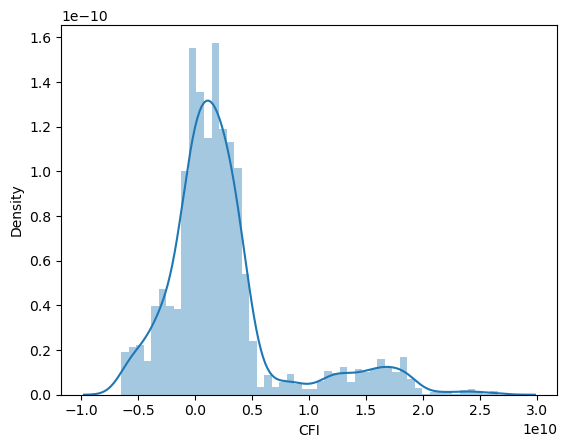

In [251]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

count   2943.0000
mean      -0.9262
std       17.4258
min     -102.6679
25%      -12.5287
50%        0.3387
75%       10.8868
max       46.9316
Name: DMI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,...,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500,...,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617,-0.6235,-2.4496,886349549.8526,-9.3782
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551,...,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279,-0.5876,-1.8409,802794548.1101,-8.7084
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814,...,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240,-0.5216,-2.5637,748768323.8329,-3.6196
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860,...,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841,-0.5269,-3.0076,649242123.9626,-11.0510
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,...,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729,-0.5460,-3.0155,538357618.6710,-15.8038


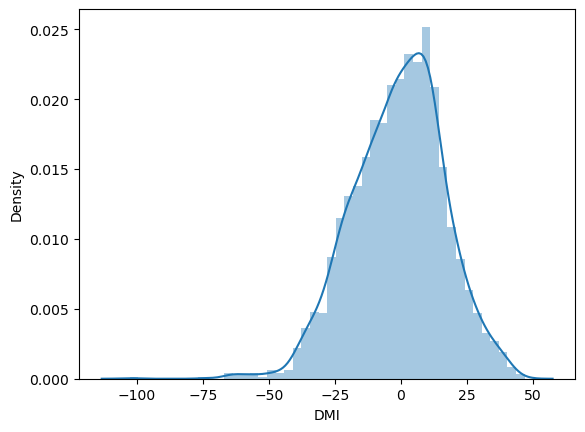

In [252]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count    2956.0000
mean    10501.8066
std      2948.2885
min      6609.1099
25%      8452.5440
50%      9536.8631
75%     11138.0303
max     18619.6094
Name: SAR, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,14318.1201,14318.1201,14192.9805,14271.6299,14271.6299,1979800,-1,45.9325,-85.7920,14231.4500,...,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617,-0.6235,-2.4496,886349549.8526,-9.3782,14731.2546
2022-12-26,14271.2002,14301.1104,14253.2002,14285.1299,14285.1299,1574600,-1,46.3362,-80.8859,14267.9551,...,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279,-0.5876,-1.8409,802794548.1101,-8.7084,14673.9281
2022-12-27,14310.1904,14410.2402,14310.1904,14328.4297,14328.4297,1821100,-1,47.6854,-71.5170,14301.5814,...,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240,-0.5216,-2.5637,748768323.8329,-3.6196,14622.3344
2022-12-28,14249.8301,14249.8301,14119.2998,14173.0996,14173.0996,1958900,-1,43.4638,-91.5553,14329.2860,...,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841,-0.5269,-3.0076,649242123.9626,-11.0510,14575.8999
2022-12-29,14097.5098,14120.5703,13981.6299,14085.0195,14085.0195,1839200,0,41.2346,-86.6551,14353.3068,...,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729,-0.5460,-3.0155,538357618.6710,-15.8038,14521.1079


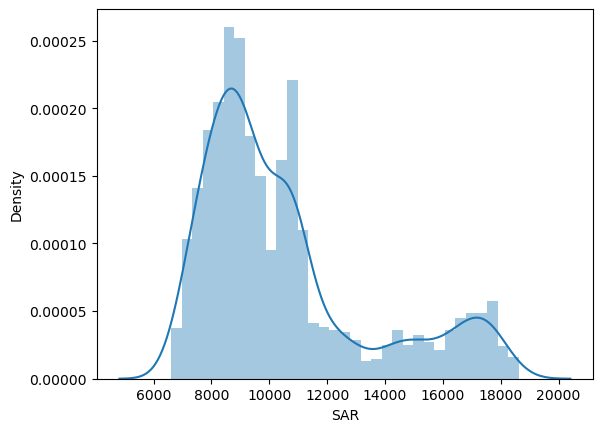

In [253]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# columns選取

In [254]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = ['RSI','Williams %R','SMA','EMA','WMA','HMA','TEMA','CCI','CMO','MACD','PPO','ROC','CFI','DMI','SAR']
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(2956, 22)
(2916, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-12-23,45.9325,-85.7920,14231.4500,14422.5496,14380.7566,14288.6791,14241.2194,-132.6125,-15.5110,-89.7617,-0.6235,-2.4496,886349549.8526,-9.3782,14731.2546,-1
2022-12-26,46.3362,-80.8859,14267.9551,14395.0657,14347.1755,14250.5664,14229.1101,-111.6921,-14.2873,-84.6279,-0.5876,-1.8409,802794548.1101,-8.7084,14673.9281,-1
2022-12-27,47.6854,-71.5170,14301.5814,14381.7385,14327.5394,14229.1974,14248.2492,-78.7065,-10.1294,-75.1240,-0.5216,-2.5637,748768323.8329,-3.6196,14622.3344,-1
2022-12-28,43.4638,-91.5553,14329.2860,14340.0107,14285.9691,14202.5323,14189.6102,-118.7289,-21.5111,-75.8841,-0.5269,-3.0076,649242123.9626,-11.0510,14575.8999,-1
2022-12-29,41.2346,-86.6551,14353.3068,14289.0125,14239.2501,14168.8734,14113.7790,-140.5083,-27.3112,-78.5729,-0.5460,-3.0155,538357618.6710,-15.8038,14521.1079,0


# features scaling

In [255]:
from sklearn.preprocessing import MinMaxScaler
import pickle
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[features] = min_max_scaler.fit_transform(df_minmax[features])#縮放到0-1之間
with open('scaler.pkl', 'wb') as f:
    pickle.dump(min_max_scaler, f)
df_minmax.tail()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-12-23,0.4844,0.1421,0.6494,0.6586,0.6548,0.6433,0.6394,0.3285,0.4303,0.3363,0.4387,0.5210,0.2231,0.5323,0.6763,-1
2022-12-26,0.4899,0.1911,0.6526,0.6562,0.6519,0.6401,0.6383,0.3577,0.4378,0.3475,0.4478,0.5362,0.2205,0.5379,0.6715,-1
2022-12-27,0.5080,0.2848,0.6557,0.6551,0.6503,0.6382,0.6400,0.4039,0.4630,0.3682,0.4645,0.5182,0.2189,0.5801,0.6672,-1
2022-12-28,0.4512,0.0844,0.6581,0.6515,0.6467,0.6360,0.6350,0.3479,0.3939,0.3665,0.4632,0.5071,0.2159,0.5184,0.6633,-1
2022-12-29,0.4212,0.1334,0.6603,0.6471,0.6426,0.6331,0.6286,0.3174,0.3588,0.3607,0.4584,0.5069,0.2125,0.4789,0.6588,0


In [256]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# Xs ,ys prepare

In [257]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
start_index = 0
end_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(start_index ,end_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:14,y_name
  X = np.array(X) # to np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  indexs.append((df.iloc[[i]].index,df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 2902/2902 [00:03<00:00, 884.77it/s]

準備完成


# check

In [258]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 2902
第一筆的index開始和結束:2011-01-26-2011-02-23
最後一筆的index開始和結束:2022-12-09-2022-12-29


# Reshape X

(圖片數量,長,寬,1張)

In [259]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(2902, 15, 15)
(2902, 15, 15, 1)


# One hot encoding of label

原始y代表漲幅

In [260]:
print(ys.shape)
print(ys[:5])

from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print(ys.shape)
print(ys[:5])

(2902, 1)
[[-1]
 [-1]
 [-1]
 [-1]
 [-1]]
(2902, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


# Visualization

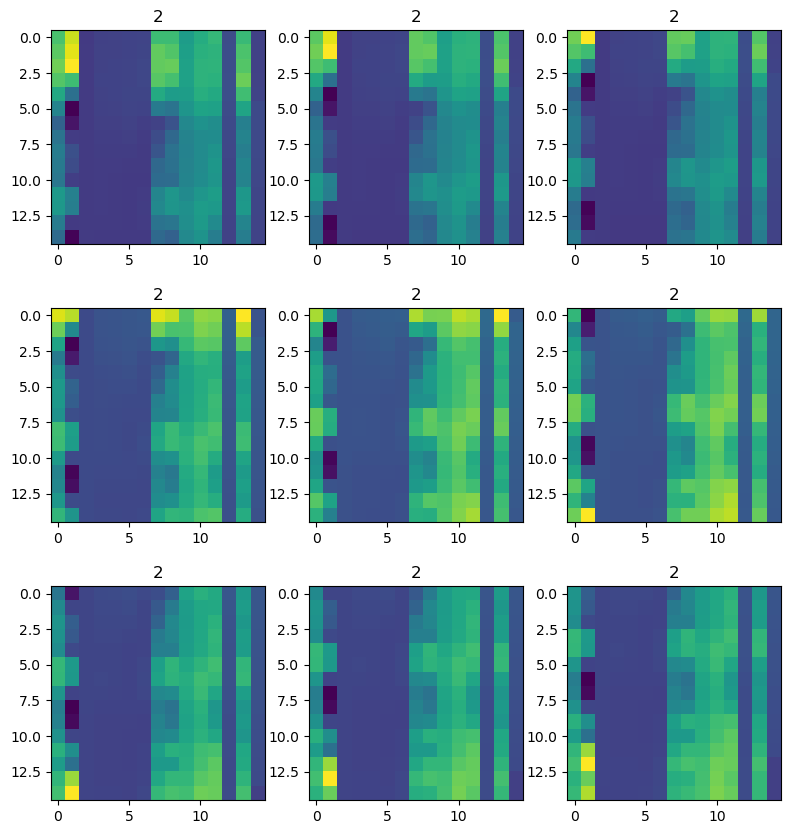

In [261]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
Xs_v = Xs.reshape(-1,Xs.shape[1],Xs.shape[2])
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xs_v[i])
    plt.title(np.argmax(ys[i]))

# Split training and test sets

In [262]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(2862, 15, 15, 1) (2862, 3) (40, 15, 15, 1)


# 調整採樣

In [263]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(2862, 225)
(2862,)
1    1217
2    1217
Name: 0, dtype: int64
(2434, 15, 15, 1)
(2434, 3)


# Split training and val sets

In [264]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(
    X_train,
    y_train, 
    test_size = 0.2,
    random_state = 42,
    shuffle = True,#是否洗牌
    stratify = y_train #是否根據y欄位做分層取樣
    )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(1947, 15, 15, 1) (1947, 3) (487, 15, 15, 1) (487, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [265]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

1    1674
2    1227
0       1
dtype: int64

In [266]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

1    1217
2    1217
dtype: int64

In [267]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

1    974
2    973
dtype: int64

In [268]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

2    244
1    243
dtype: int64

# CNN

In [269]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [270]:
nclasses = 3 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 15, 15, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dropout_12 (Dropout)        (None, 576)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               73856     
                                                      

In [271]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 優化器

In [272]:
#1
lr_reduction = ReduceLROnPlateau(
    monitor = 'val_acc', 
    factor=0.5, 
    patience = 3, 
    verbose = 1, 
    min_lr = 0.00001)

#2
es = EarlyStopping(monitor='val_acc',#驗證集acc
                   min_delta=0.1, 
                   patience=10,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [273]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 128,
    epochs = 500,
    validation_data=(xval,yval),
    verbose=1,callbacks=[es]
    )

Epoch 1/500
16/16 [==============================] - 2s 54ms/step - loss: 0.9409 - accuracy: 0.5064 - val_loss: 0.7191 - val_accuracy: 0.5975
Epoch 2/500
16/16 [==============================] - 1s 40ms/step - loss: 0.7674 - accuracy: 0.5300 - val_loss: 0.6656 - val_accuracy: 0.5236
Epoch 3/500
16/16 [==============================] - 1s 40ms/step - loss: 0.7190 - accuracy: 0.5691 - val_loss: 0.6052 - val_accuracy: 0.7207
Epoch 4/500
16/16 [==============================] - 1s 40ms/step - loss: 0.6503 - accuracy: 0.6579 - val_loss: 0.4989 - val_accuracy: 0.7864
Epoch 5/500
16/16 [==============================] - 1s 41ms/step - loss: 0.5554 - accuracy: 0.7406 - val_loss: 0.3920 - val_accuracy: 0.8686
Epoch 6/500
16/16 [==============================] - 1s 40ms/step - loss: 0.4692 - accuracy: 0.7930 - val_loss: 0.2869 - val_accuracy: 0.8891
Epoch 7/500
16/16 [==============================] - 1s 41ms/step - loss: 0.4347 - accuracy: 0.8172 - val_loss: 0.2984 - val_accuracy: 0.8747
Epoch 

# 訓練過程評估

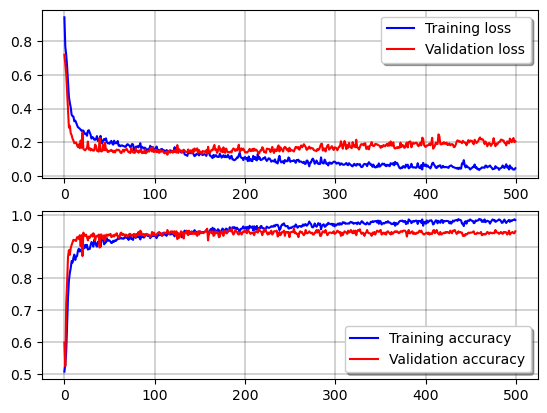

In [274]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

16/16 [==============================] - 0s 3ms/step


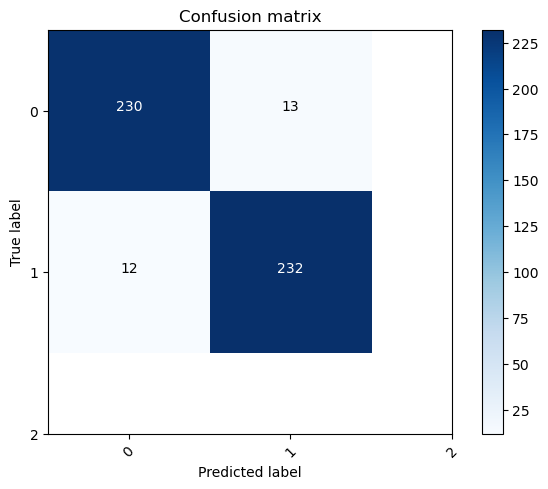

In [275]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [276]:
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
print(y_pred[:5])

16/16 [==============================] - 0s 4ms/step
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


真實y值

In [277]:
print(yval[:5])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


# 分類報告

In [278]:
def 勝率(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
勝率(yval,y_pred)

0.9486652977412731

In [279]:
from sklearn.metrics import classification_report 
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Hold       0.00      0.00      0.00         0
         BUY       0.95      0.95      0.95       243
        SELL       0.95      0.95      0.95       244

   micro avg       0.95      0.95      0.95       487
   macro avg       0.63      0.63      0.63       487
weighted avg       0.95      0.95      0.95       487
 samples avg       0.95      0.95      0.95       487



c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# plot error

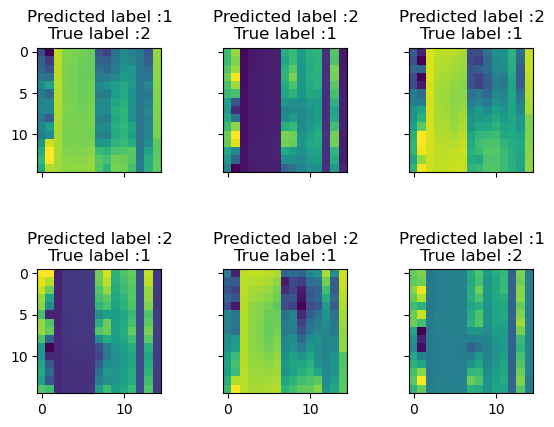

In [280]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

## 測試集預測

In [281]:
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))

2/2 [==============================] - 0s 5ms/step
40


# 預測結果

[*********************100%***********************]  1 of 1 completed


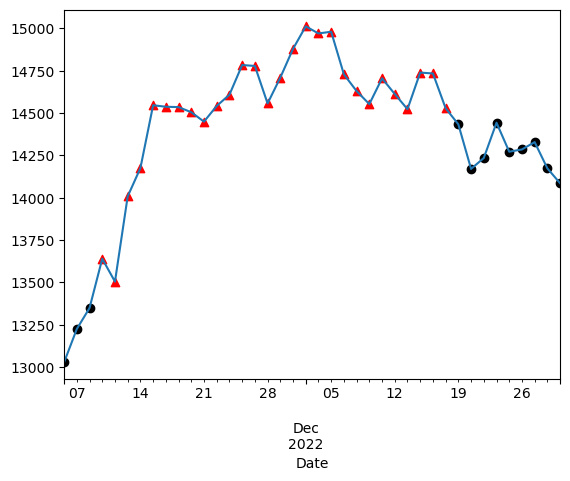

In [282]:
C = pd.DataFrame()
C['Close'] = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)['Close']
C['SIGNAL'] = 0
C = C.tail(len(answer))
C['SIGNAL'] = answer 
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

In [283]:
import pandas as pd
# Set the float_format option to not use scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.drop(['SIGNAL'],axis=1).tail(20)

2/2 [==============================] - 0s 0s/step


,Close,HOLD%,BUY%,SELL%
Date,,,,
2022-12-02,14970.6797,0.0000,1.0000,0.0000
2022-12-05,14980.7402,0.0000,1.0000,0.0000
2022-12-06,14728.8799,0.0000,1.0000,0.0000
2022-12-07,14630.0098,0.0000,1.0000,0.0000
2022-12-08,14553.0400,0.0000,1.0000,0.0000
2022-12-09,14705.4297,0.0000,1.0000,0.0000
2022-12-12,14612.5898,0.0000,1.0000,0.0000
2022-12-13,14522.9600,0.0000,1.0000,0.0000
2022-12-14,14739.3604,0.0000,1.0000,0.0000


# save model

In [284]:
model.save('model.h5')
del model

In [285]:
from keras.models import load_model
model = load_model('model.h5')
predict = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [286]:
predict[-5:]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)